In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exact_column = "exact_data_based"
eps = 0.000001

import utils
input = utils.load_data([
    "../results/synthetic/1000/set4_aggregated/",
], "_x80_*")

data = utils.merge_exact(input, "exact_data_based")

# plot PNS of less EMCC agains bounds of 80 runs

In [3]:
for n in range(80):
    cols = [f"pns_{i}" for i in range(n+1)]
    a = data[cols].min(axis=1)
    b = data[cols].max(axis=1)
    l = data.pns_l_x
    u = data.pns_u_x

    data[f'error_r_{n}'] = np.sqrt(((l - a) ** 2 + (u - b) ** 2) / 2) / (u - l)


In [4]:
ns = [20, 40, 60]

nsname=str.join("-", np.array(ns).astype(str))
err_cols = [f'error_r_{i}' for i in ns]

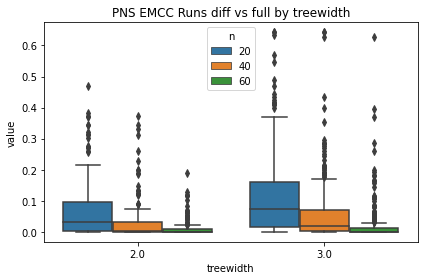

In [11]:
d = data[data.selector & ~data.identifiable]
d = d[~np.isnan(d.treewidth)]

dta = pd.melt(d[err_cols + ["treewidth"]], id_vars="treewidth")
dta["n"]=dta.variable.str.split("_").str[-1].astype(int)
sns.boxplot(x="treewidth", hue="n", y="value", data=dta, hue_order=ns)
plt.title("PNS EMCC Runs diff vs full by treewidth")
plt.tight_layout()
plt.savefig(f"PNS_runs_all_{nsname}.png")
plt.show()

dta[['treewidth','n','value']].to_csv(f"PNS_runs_all_{nsname}.csv")

# save boxplots
with np.printoptions(linewidth=100000):
    utils.boxplots(dta, "value", "treewidth", "n").to_csv(f"PNS_runs_all_{nsname}_boxplots.csv")

# separate plots by markovianity

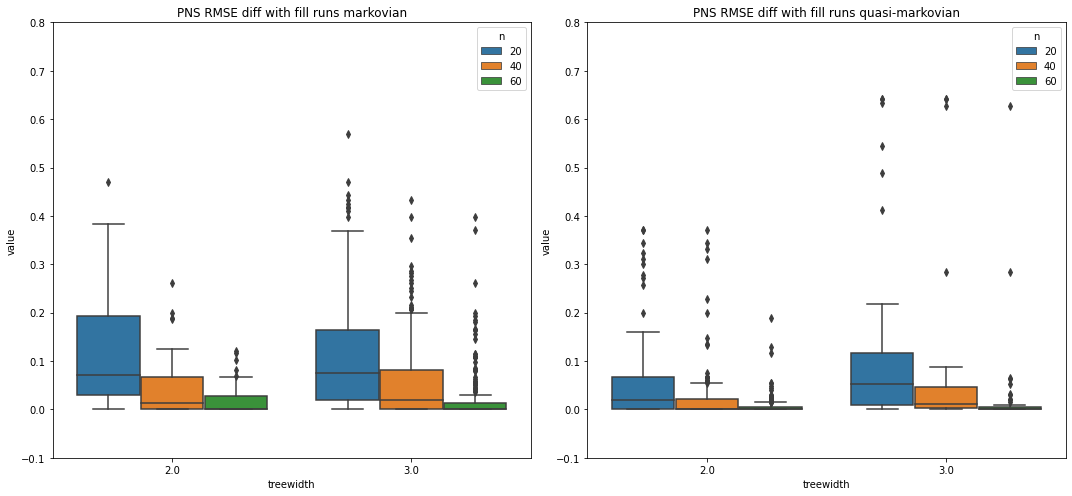

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
i = 0
d = data[data.selector & ~data.identifiable]
d = d[~np.isnan(d.treewidth)]

for mark in data.markovianity.unique():
    dta = pd.melt(d[d.markovianity==mark][err_cols + ["treewidth"]], id_vars="treewidth")
    dta["n"]=dta.variable.str.split("_").str[-1].astype(int)

    with np.printoptions(linewidth=100000):
        xx =utils.boxplots(dta, "value", "treewidth", "n")
        xx['markovianity'] = mark
        xx.to_csv(f"PNS_runs_all_markovianity_{mark}_{nsname}_boxplots.csv")

    p = sns.boxplot(ax=ax[i], x="treewidth", hue="n", y="value", data=dta, hue_order=ns)
    p.set_title(f"PNS RMSE diff with fill runs {mark}")
    p.set(ylim=(-0.1,0.8))
    dta.to_csv(f"PNS_runs_all_markovianity_{mark}_{nsname}.csv")
    i += 1

plt.tight_layout()

fig.savefig(f"PNS_runs_all_markovianity_{nsname}.png")




In [233]:
dta = pd.melt(data[data.markovianity==mark][err_cols + ["treewidth"]], id_vars="treewidth")
dta["n"]=dta.variable.str.split("_").str[-1].astype(int)
dta = dta[~np.isnan(dta.treewidth)]

for one in dta["n"].unique():
    for two in dta['treewidth'].unique():
        sel = dta[(dta["n"] == one) & (dta['treewidth'] == two)]
        vals = sel['value']

        

Series([], Name: value, dtype: float64) 0.0 0.00846798114607323 0.05513601171078725 0.17821482270403965 0.28072136345065585 4      0.415988
5      0.396863
6      0.384761
8      0.320034
9      0.456311
80     0.481798
86     0.422712
136    0.363649
237    0.660454
238    0.607197
239    0.657903
243    0.411414
402    0.487709
403    0.545486
405    0.634011
406    0.642202
407    0.642202
430    0.638909
437    0.707063
439    0.398630
Name: value, dtype: float64
Series([], Name: value, dtype: float64) 0.0 0.004871899881893986 0.03873622356096596 0.11992007227715991 0.19981607839710186 62     0.257704
71     0.344791
72     0.311089
73     0.370368
114    0.234937
117    0.413565
118    0.277325
120    0.225126
171    0.322665
180    0.484470
187    0.340605
188    0.417262
189    0.617807
300    0.488819
307    0.439164
308    0.439164
309    0.439164
325    0.459633
326    0.227336
340    0.248978
347    0.547411
348    0.478393
349    0.478393
352    0.277025
361    0.272281
362

In [241]:
a = np.array(sel['value'])

In [244]:
a[a > 0.1].min()

0.10733921466773612

# now by the range of the interval

In [126]:
data["range"]=pd.cut(data.pns_u_x - data.pns_l_x, bins=3)

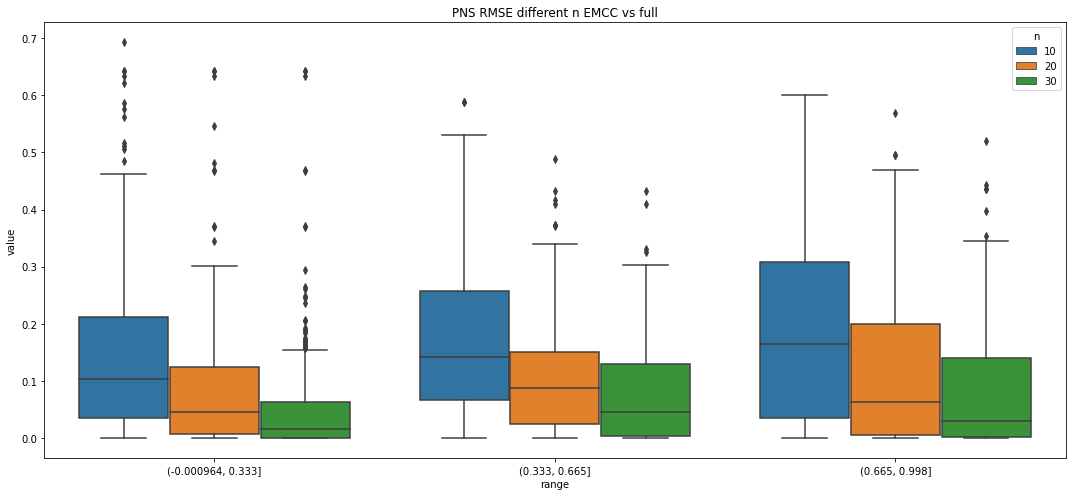

In [130]:
plt.figure(figsize=(15,7))
dta = pd.melt(data[err_cols + ["range"]], id_vars="range")
dta["n"] = dta.variable.str.split("_").str[-1].astype(int)
a = sns.boxplot(x="range", hue="n", y="value", data=dta, hue_order=ns)
a.set(title="PNS RMSE different n EMCC vs full")
dta['range'] = dta.range.astype(str)
dta[["n", "range", "value"]].to_csv(f"PNS_runs_all_by_range_{nsname}.csv")
plt.tight_layout()
plt.savefig(f"PNS_runs_all_by_range_{nsname}.png")

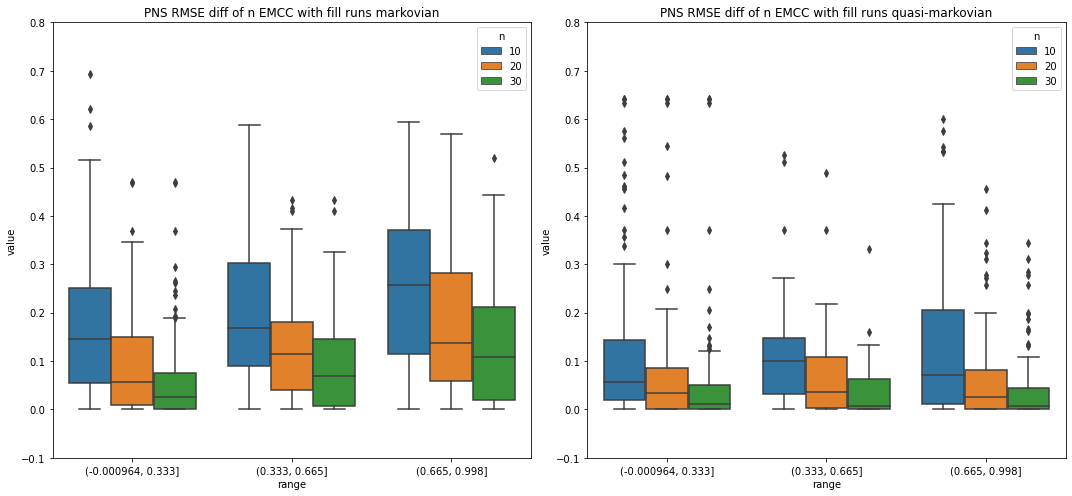

In [134]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
i = 0
for mark in data.markovianity.unique():
    dta = pd.melt(data[data.markovianity==mark][err_cols + ["range"]], id_vars="range")
    dta["n"] = dta.variable.str.split("_").str[-1].astype(int)
    p = sns.boxplot(x="range", hue="n", y="value", data=dta, hue_order=ns, ax=ax[i])

    #p = sns.boxplot(ax=ax[i], x="range", hue="variable", y="value", data=dta, hue_order=err_cols)
    p.set_title(f"PNS RMSE diff of n EMCC with fill runs {mark}")
    p.set(ylim=(-0.1,0.8))
    i += 1
    dta['range']=dta.range.astype(str)
    dta[["n","range","value"]].to_csv(f"PNS_runs_all_by_range_markovianity_{mark}_{nsname}.csv")
plt.tight_layout()
plt.savefig(f"PNS_runs_all_by_range_markovianity_{nsname}.png")